<a href="https://colab.research.google.com/github/Basilem677/2024_Geoinformatique_I/blob/main/Copie_de_S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Cr√©er de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des donn√©es √† partir de fichiers `.npy` * Effectuer des r√©ductions (par exemple `.npy`)
* Effectuer des r√©ductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* R√©aliser des trac√©s lin√©aires 1D
* R√©aliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce probl√®me, nous utilisons des donn√©es r√©elles provenant de flotteurs de profilage oc√©anique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des donn√©es sur la temp√©rature, la salinit√© et la pression de l'oc√©an. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures √† diff√©rentes profondeurs ou "niveaux").

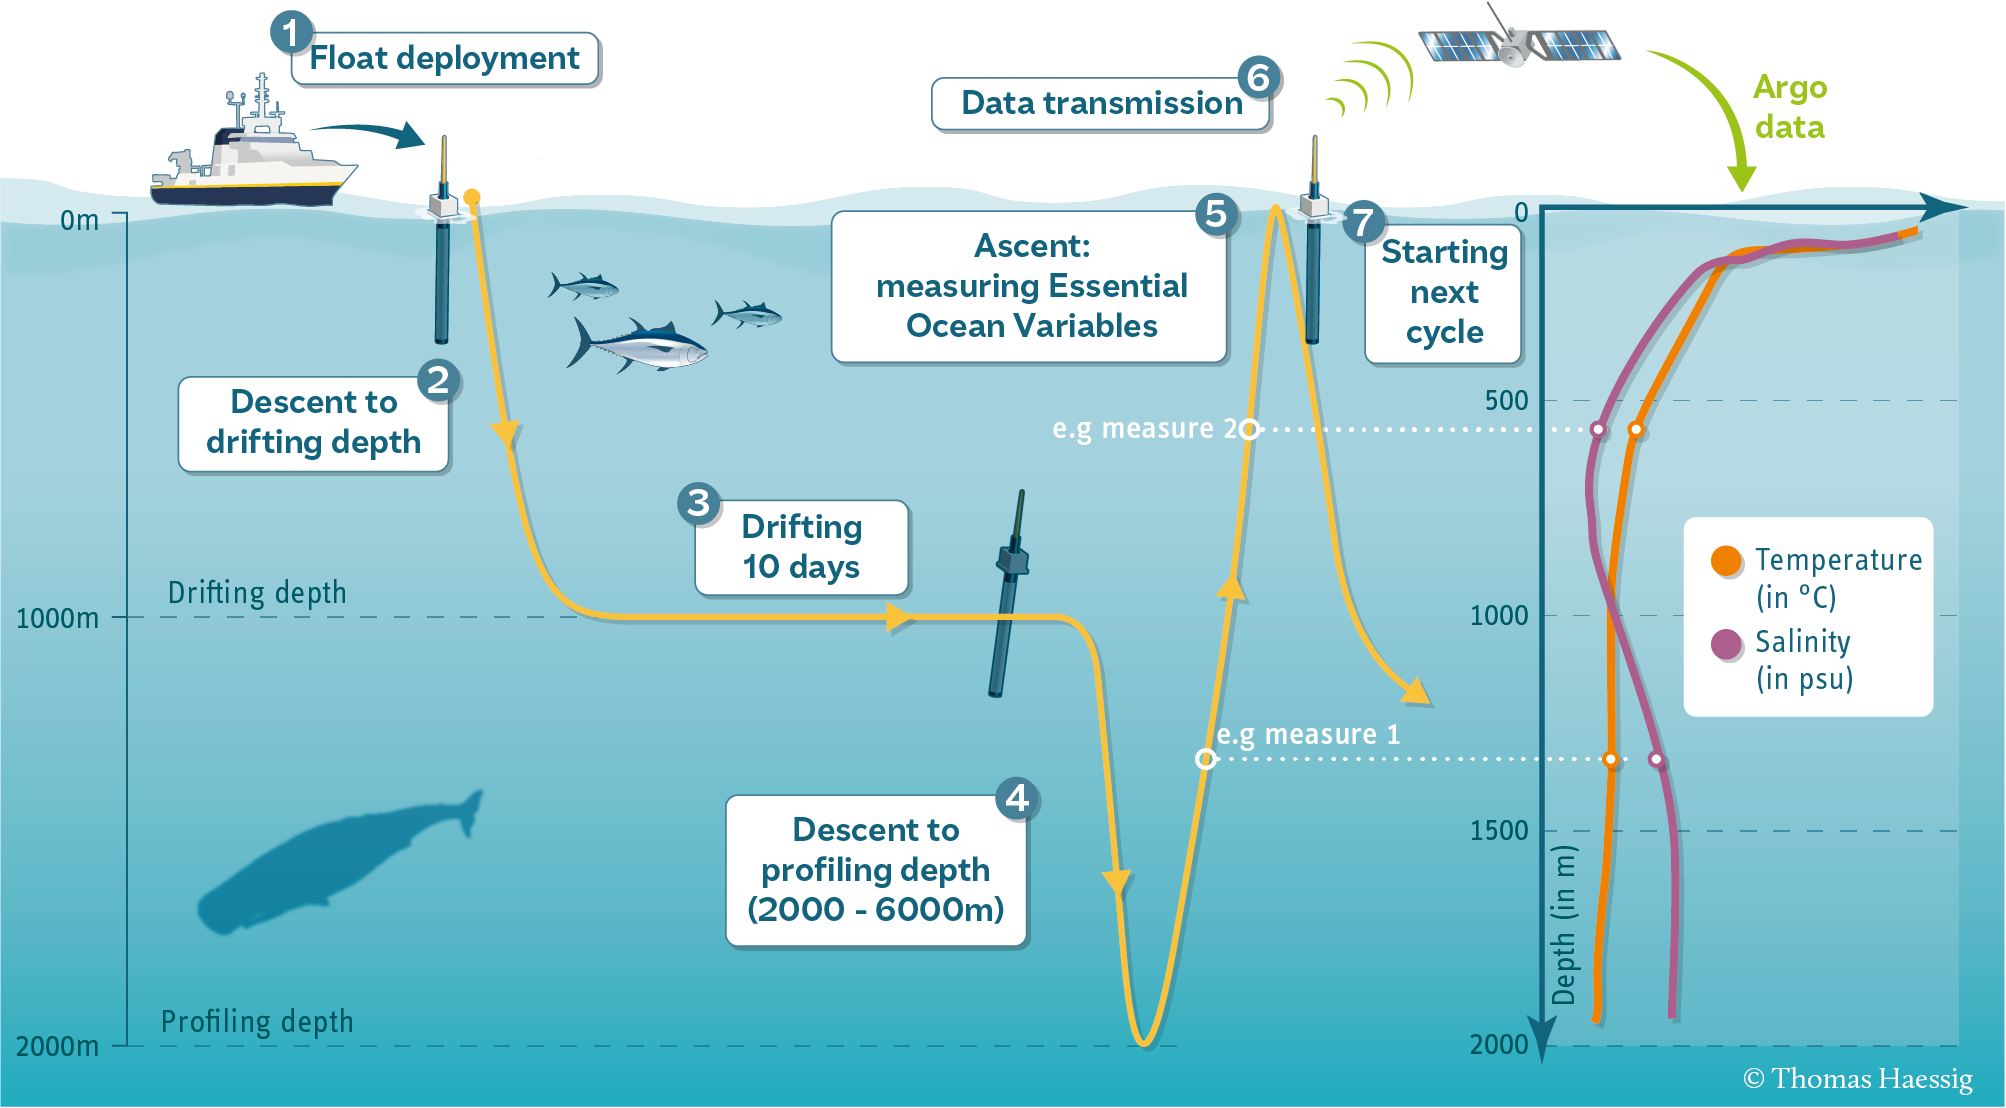


Chaque profil est associ√© √† une latitude, une longitude et une date, ainsi qu'√† de nombreux niveaux diff√©rents.

Commen√ßons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour t√©l√©charger les fichiers de donn√©es dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir √† l'√©tape suivante.

In [ ]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy']

In [ ]:
import numpy as np

**Q1) Chargez chaque fichier de donn√©es sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : temp√©rature

`S` : salinit√©

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les √©l√©ments dans `files`) pour savoir quel fichier correspond √† quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Afficher les noms des √©l√©ments des fichiers ici

In [ ]:
'S.npy', 'T.npy', 'levels.npy', 'P.npy', 'lat.npy','lon.npy', 'date.npy'

('S.npy', 'T.npy', 'levels.npy', 'P.npy', 'lat.npy', 'lon.npy', 'date.npy')

Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compr√©hension de liste

In [ ]:
S,level,P,lat,lon,T,date = [np.load(files[i]) for i in range(len(files))]

**Q2) Recr√©ez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [√† ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Afficher le tableau `level` (niveau)

In [ ]:
print (level)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recr√©er le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [ ]:
level_arange = level[np.arange(0,len(level))]

V√©rifiez que `level` et `level_arange` sont √©gaux en utilisant `np.testing.assert_equal`

In [ ]:
np.testing.assert_equal(level,level_arange)

Recr√©er le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [ ]:
level_linspace = level[np.linspace(0,len(level)-1,len(level)).astype(int)]

V√©rifiez que `level` et `level_linspace` sont √©gaux en utilisant `np.testing.assert_equal`

In [ ]:
np.testing.assert_equal(level,level_linspace)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport √† `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont li√©s ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Afficher les formes de toutes les variables charg√©es

In [ ]:
print(level.shape)
print(lon.shape)
print(lat.shape)
print(date.shape)

(78,)
(75,)
(75,)
(75,)


In [ ]:
print(T.shape)
print(S.shape)
print(P.shape)

(78, 75)
(78, 75)
(78, 75)


D'apr√®s les formes, quelles sont les dimensions partag√©es entre les tableaux ?

R√©ponse : T, P, S sont compos√©s d'un tableau de 78 par 75, lon, level, lat et date sont uniquement compos√© d'un string, sur 75 lignes ou 78 lignes.

**Q4) En vous basant sur la formule ci-dessous, calculez la densit√© de l'eau de mer `relative_density`, par rapport √† l'eau pure, en fonction de la temp√©rature, de la salinit√© et de la pression.**

`densit√©_relative`$ = œÅ -œÅ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

o√π :

* Les densit√©s $\rho$ et $œÅ_{Pure\ eau}$ sont exprim√©es en unit√©s $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la temp√©rature conservative $\Theta$ (en unit√©s Celcius) √† partir de la temp√©rature, de la salinit√© et de la pression est fournie ci-dessous.
* La temp√©rature $T$ est exprim√©e en unit√©s Celcius.
* La salinit√© $S$ est exprim√©e en unit√©s $g/kg$.
* La pression $p$ est exprim√©e en unit√©s $dbar$.

Astuce : Les tableaux `numpy` charg√©s `temperature`, `salinity`, et `pressure` ont d√©j√† les bonnes unit√©s et aucune conversion n'est n√©cessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [ ]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3


[[18.97400093 18.43700027 19.09900093 ... 19.11300087 21.82299995
  20.13100052]
 [18.74099922 18.39999962 19.08200073 ... 18.47200012 19.45999908
  20.125     ]
 [18.37000084 18.37400055 19.06500053 ... 18.22999954 19.26199913
  20.07699966]
 ...
 [ 3.79299998  3.81399989  3.80200005 ...  3.80699992  3.81100011
   3.8599999 ]
 [ 3.76399994  3.77800012  3.75699997 ...  3.75399995  3.74600005
   3.80599999]
 [ 3.74399996  3.74600005  3.7249999  ...         nan  3.71399999
          nan]]


Importons la biblioth√®que [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la temp√©rature conservative $\Theta$ √† partir de la temp√©rature, de la salinit√© et de la pression.

In [ ]:
!pip install gsw
from gsw import CT_from_t

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.4/2.4 MB 31.2 MB/s eta 0:00:00


Maintenant, c'est √† vous de jouer. Voici l'√©quation pour √©viter d'avoir √† faire d√©filer la page vers le haut :

`densit√©_relative`$ = œÅ -œÅ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculer la temp√©rature conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [ ]:
temp_cons = CT_from_t(S,T,P)

[[35.6389389  35.51495743 35.57297134 ... 35.82093811 35.77793884
  35.66891098]
 [35.63393784 35.5219574  35.57397079 ... 35.81093216 35.58389664
  35.66791153]
 [35.6819458  35.52595901 35.57297134 ... 35.79592896 35.66290665
  35.66591263]
 ...
 [34.91585922 34.92390442 34.92390442 ... 34.93481064 34.94081116
  34.94680786]
 [34.91585922 34.92390442 34.92190552 ... 34.93280792 34.93680954
  34.94380951]
 [34.91785812 34.92390442 34.92390442 ...         nan 34.93680954
          nan]]


Calculez la "densit√© relative" √† l'aide de l'√©quation ci-dessus.

In [ ]:
relative_density = a*S + b*temp_cons + c*temp_cons**2

**Q4) Faites un graphique pour chaque colonne de donn√©es dans `T`, `S`, `P`, et
`densit√©_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la biblioth√®que [Matplotlib](https://matplotlib.org/) pour la visualisation, m√™me si nous ne l'avons pas encore √©tudi√©e en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles √† suivre ci-dessous. üòä

La premi√®re √©tape consiste √† importer Pyplot. Il suffit d'ex√©cuter le code ci-dessous.

In [ ]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'oc√©an, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en d√©duire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'√©chelle verticale doit utiliser les donn√©es `level` pour √™tre coh√©rente avec les conventions oc√©anographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de donn√©es. Le r√©sultat sera d√©sordonn√©, comme dans le graphique ci-dessous :

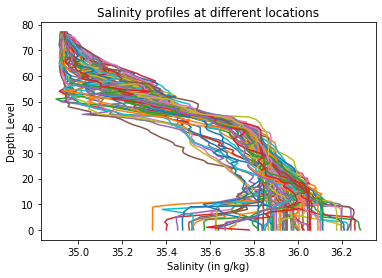

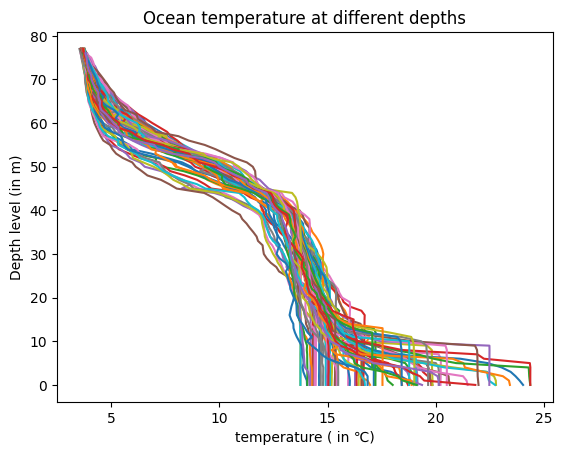

In [ ]:
plt.plot(T,level) ; # Le point-virgule emp√™che l'impression des objets de ligne
plt.xlabel('temperature ( in ‚ÑÉ)') # Prend une cha√Æne de caract√®res comme argument
plt.ylabel('Depth level (in m)')
plt.title('Ocean temperature at different depths')
plt.show()

Faites plus de plots ci-dessous:

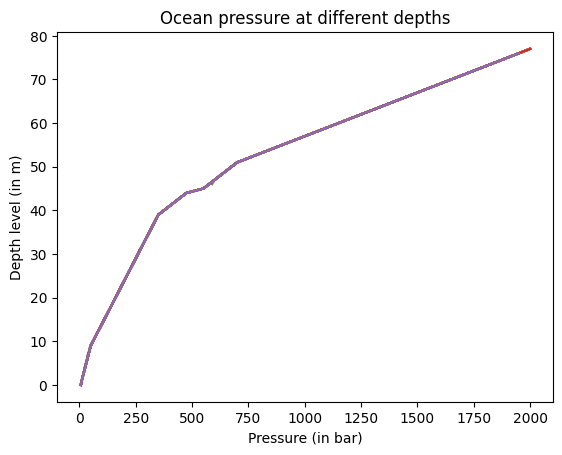

In [ ]:
plt.plot(P,level) ; # Le point-virgule emp√™che l'impression des objets de ligne
plt.xlabel('Pressure (in bar)') # Prend une cha√Æne de caract√®res comme argument
plt.ylabel('Depth level (in m)')
plt.title('Ocean pressure at different depths')
plt.show()

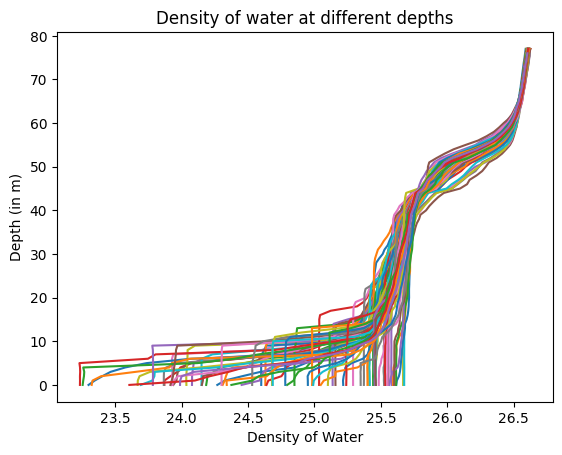

In [ ]:
plt.plot(relative_density, level) ; # Le point-virgule emp√™che l'impression des objets de ligne
plt.xlabel('Density of Water') # Prend une cha√Æne de caract√®res comme argument
plt.ylabel('Depth (in m)')
plt.title('Density of water at different depths')
plt.show()

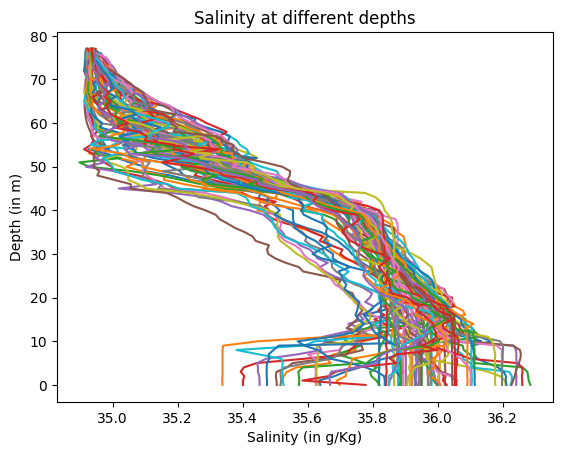

In [ ]:
plt.plot(S,level) ; # Le point-virgule emp√™che l'impression des objets de ligne
plt.xlabel('Salinity (in g/Kg)') # Prend une cha√Æne de caract√®res comme argument
plt.ylabel('Depth (in m)')
plt.title('Salinity at different depths')
plt.show()

**Q5) Calculez la moyenne et l'√©cart-type de `T`, `S`, `P`, et `seawater_density` √† chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez v√©rifier que vous avez pris la moyenne et les √©carts types le long des axes corrects en v√©rifiant la "forme" de vos r√©sultats.

Calculer les moyennes...

In [ ]:

np.mean(T, axis=1)


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 10.80430666, 10.49702667, 10.1749066 ,  9.83453334,
        9.48625332,  9.19793334,  8.66010666,  8.12324001,  7.60221333,
        7.15289333,  6.74250667,  6.39543999,  6.04598667,  5.74538665,
        5.48913333,  5.26604001,  5.08768   ,  4.93479998,  4.77769334,
        4.65368   ,  4.54237334,  4.44274664,  4.35933333,      

In [ ]:
np.mean(S, axis=1)


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 35.41392634, 35.3810557 , 35.34845245, 35.31531555,
       35.28392568, 35.26568334, 35.2389473 , 35.21583745, 35.19686081,
       35.18231257, 35.1648436 , 35.15073542, 35.12509338, 35.10155869,
       35.08199799, 35.06317012, 35.0490097 , 35.03678253, 35.02174266,
       35.01135579, 35.00212936, 34.99386297, 34.98810328,      

In [ ]:
np.mean(P, axis=1)

array([   6.43466671,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,  575.68400146,  600.42400716,
        625.30800456,  650.34533773,  675.33333984,  700.37067546,
        750.42400716,  800.36666992,  850.38534017,  900.4613387 ,
        950.45067383, 1000.38534261, 1050.38534668, 1100.45734

In [ ]:
np.mean(relative_density, axis=1)

(75,)

... et les √©carts types.

In [ ]:
np.std(T, axis=1)
np.std(S, axis=1)
np.std(P, axis=1)
np.std(relative_density, axis=1)

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.06560189, 0.06954326, 0.07525136, 0.08012412,
       0.08297409, 0.08501657, 0.0849015 , 0.07918053, 0.06847191,
       0.05889347, 0.04711212, 0.03604723, 0.0282499 , 0.02338445,
       0.01821967, 0.01424514, 0.01090861, 0.00923819, 0.00845313,
       0.00774326, 0.00694736, 0.00663108, 0.00649737,        nan,
              nan,        nan,        nan,        nan,        

V√©rifiez qu'elles ont la m√™me forme que vos coordonn√©es de niveau vertical `lev` :

In [ ]:
np.testing.assert_equal(np.std(P, axis=1).shape,level.shape)
np.testing.assert_equal(np.mean(P, axis=1).shape,level.shape)

**Q6) Faites maintenant des trac√©s similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densit√©_de_l'eau_de_mer` √† chaque profondeur. Faites appara√Ætre les barres d'erreur sur chaque graphique en utilisant les √©carts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires √† celui ci-dessous

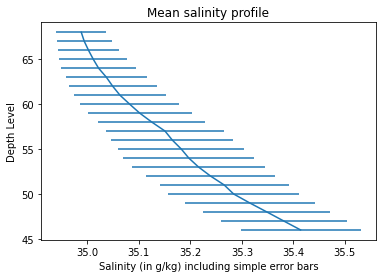

Text(0.5, 1.0, 'Mean salinity profile')

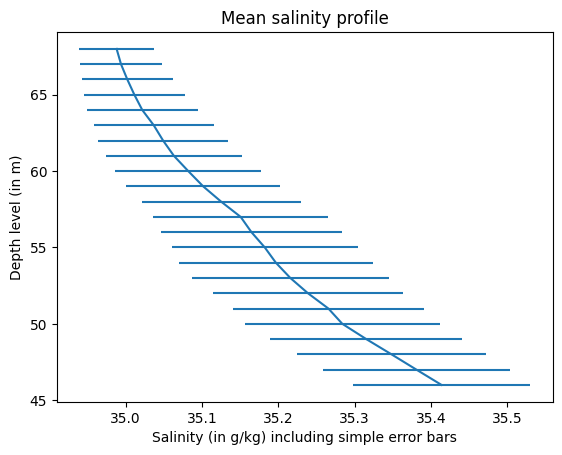

In [ ]:
plt.errorbar(np.mean(S,axis=1),level, xerr=np.std(S,axis=1))
plt.xlabel('Salinity (in g/kg) including simple error bars')
plt.ylabel('Depth level (in m)')
plt.title('Mean salinity profile')

Encore trois plots et nous serons pr√™ts üôÇ .

Text(0.5, 1.0, 'Mean temperature profile')

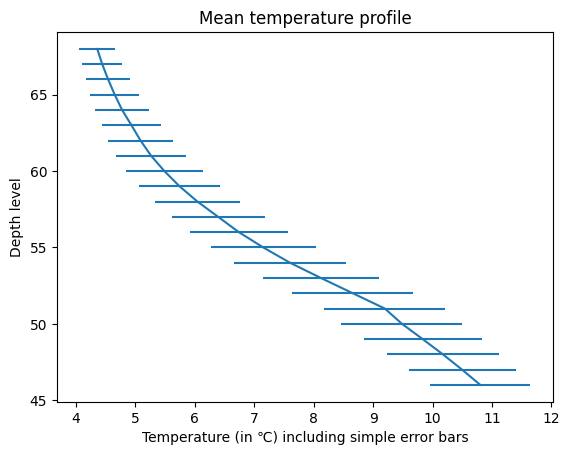

In [ ]:
plt.errorbar(np.mean(T,axis=1),level, xerr=np.std(T,axis=1))
plt.xlabel('Temperature (in ‚ÑÉ) including simple error bars')
plt.ylabel('Depth level (in m)')
plt.title('Mean temperature profile')

Text(0.5, 1.0, 'Mean Pressure profile')

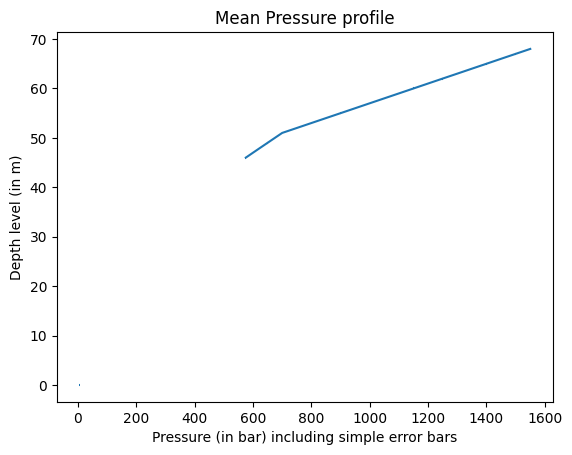

In [ ]:
plt.errorbar(np.mean(P,axis=1),level, xerr=np.std(P,axis=1))
plt.xlabel('Pressure (in bar) including simple error bars')
plt.ylabel('Depth level (in m)')
plt.title('Mean Pressure profile')

Text(0.5, 1.0, 'Mean Sea Water Density profile')

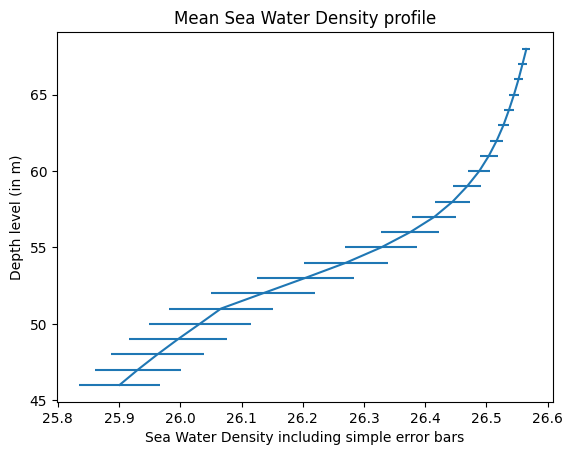

In [ ]:
plt.errorbar(np.mean(relative_density,axis=1),level, xerr=np.std(relative_density,axis=1))
plt.xlabel('Sea Water Density including simple error bars')
plt.ylabel('Depth level (in m)')
plt.title('Mean Sea Water Density profile')

**Q7) Prise en compte des donn√©es manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiqu√©es par la valeur sp√©ciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'√©cart type des donn√©es contenant des NaN, le r√©sultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions sp√©ciales `np.nanmean` et `np.nanstd`, vous dites √† NumPy d'ignorer les NaN.

Recalculez les moyennes et les √©carts types comme dans les sections pr√©c√©dentes en utilisant ces fonctions et tracez les r√©sultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous esp√©rons que vous pouvez maintenant trouver la syntaxe compl√®te vous-m√™me üòé

In [ ]:
np.nanmean(T, axis=1)
np.nanmean(P, axis=1)
np.nanmean(S, axis=1)
np.nanmean(relative_density, axis=1)


array([24.78240233, 24.78821109, 24.80399782, 24.82743035, 24.87624749,
       24.93505192, 25.00370627, 25.08667989, 25.15853103, 25.19442663,
       25.29416932, 25.34780098, 25.39473801, 25.42469762, 25.45551823,
       25.4747458 , 25.49108317, 25.50466497, 25.5174275 , 25.5289992 ,
       25.54075328, 25.54977119, 25.55835993, 25.56885754, 25.57894844,
       25.58796136, 25.5962309 , 25.60320348, 25.6101259 , 25.61740575,
       25.62466277, 25.63150207, 25.63954389, 25.64740666, 25.65510627,
       25.66257397, 25.66976418, 25.67725377, 25.68471148, 25.69229216,
       25.71183333, 25.73002004, 25.74997439, 25.77201241, 25.79419758,
       25.87205588, 25.90086615, 25.93076294, 25.96266297, 25.99633694,
       26.03175294, 26.06651762, 26.13495917, 26.20371829, 26.27052919,
       26.3278476 , 26.37530871, 26.41480354, 26.44470169, 26.46826568,
       26.48821066, 26.50384344, 26.51677094, 26.52768415, 26.53668014,
       26.54491708, 26.55228621, 26.55881519, 26.56519787, 26.57

Text(0.5, 1.0, 'Mean temperature profile')

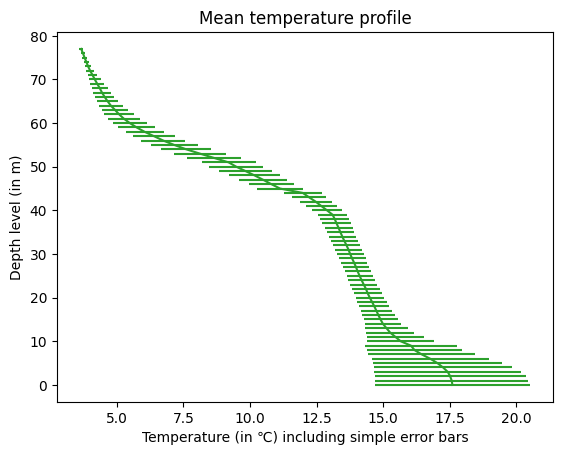

In [125]:
plt.errorbar(np.nanmean(T,axis=1),level, xerr=np.nanstd(T,axis=1),c='#2ca02c')
plt.xlabel('Temperature (in ‚ÑÉ) including simple error bars')
plt.ylabel('Depth level (in m)')
plt.title('Mean temperature profile')

De m√™me, recalculez les √©carts types en ignorant les valeurs manquantes.

Text(0.5, 1.0, 'Mean salinity profile')

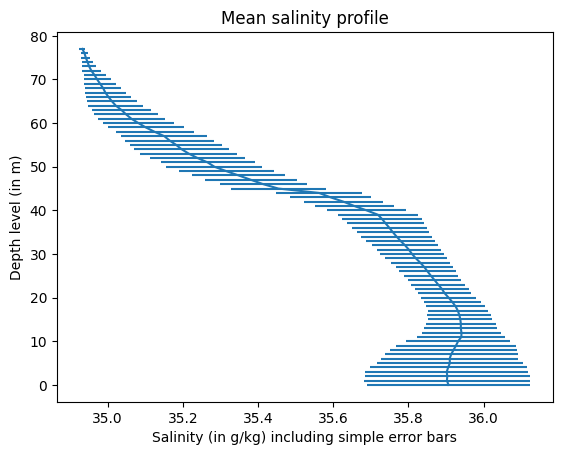

In [ ]:
plt.errorbar(np.nanmean(S,axis=1),level, xerr=np.nanstd(S,axis=1))
plt.xlabel('Salinity (in g/kg) including simple error bars')
plt.ylabel('Depth level (in m)')
plt.title('Mean salinity profile')

Text(0.5, 1.0, 'Mean Pressure profile')

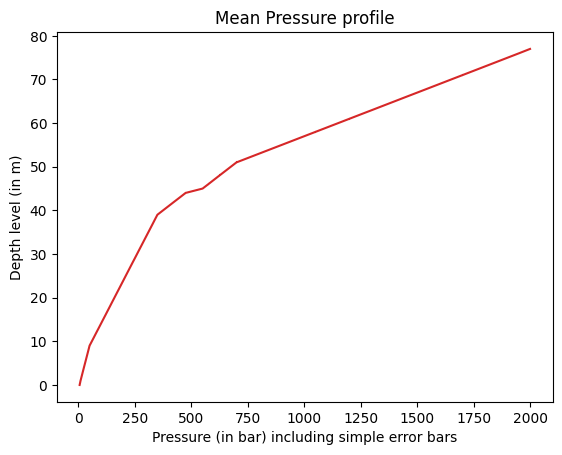

In [120]:
plt.errorbar(np.nanmean(P,axis=1),level, xerr=np.nanstd(P,axis=1),c='#d62728')
plt.xlabel('Pressure (in bar) including simple error bars')
plt.ylabel('Depth level (in m)')
plt.title('Mean Pressure profile')

Text(0.5, 1.0, 'Mean Sea Water Density profile')

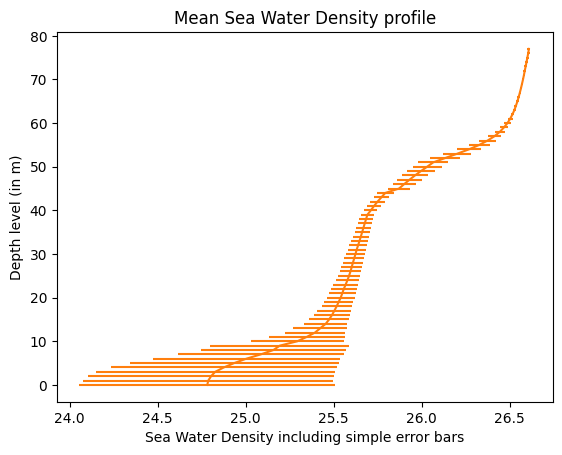

In [124]:
plt.errorbar(np.nanmean(relative_density,axis=1),level, xerr=np.nanstd(relative_density,axis=1), c='#ff7f0e')
plt.xlabel('Sea Water Density including simple error bars')
plt.ylabel('Depth level (in m)')
plt.title('Mean Sea Water Density profile')

In [ ]:
np.nanstd(T, axis=1)
np.nanstd(S, axis=1)
np.nanstd(P, axis=1)
np.nanstd(relative_density, axis=1)

array([0.72628301, 0.71056568, 0.70081643, 0.67881162, 0.64138477,
       0.5940689 , 0.53119921, 0.47274702, 0.41060919, 0.3944036 ,
       0.26406948, 0.21696375, 0.17136278, 0.15224668, 0.12259564,
       0.11235218, 0.10390261, 0.09645264, 0.08575266, 0.08238438,
       0.07845066, 0.07664579, 0.07471934, 0.07017307, 0.06593684,
       0.06311117, 0.06108226, 0.05923067, 0.05819081, 0.05585184,
       0.05351971, 0.05178967, 0.04918457, 0.04712294, 0.04451595,
       0.04251347, 0.04121078, 0.03973457, 0.03914086, 0.03753483,
       0.03750514, 0.03940821, 0.04072732, 0.04245762, 0.04731466,
       0.06110755, 0.06560189, 0.06954326, 0.07525136, 0.08012412,
       0.08297409, 0.08501657, 0.0849015 , 0.07918053, 0.06847191,
       0.05889347, 0.04711212, 0.03604723, 0.0282499 , 0.02338445,
       0.01821967, 0.01424514, 0.01090861, 0.00923819, 0.00845313,
       0.00774326, 0.00694736, 0.00663108, 0.00649737, 0.00681396,
       0.00683985, 0.0069283 , 0.00730848, 0.00736786, 0.00743

**Q8) Cr√©ez un diagramme de dispersion des coordonn√©es longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parl√© dans le tutoriel, mais il existe une fonction de diagramme de dispersion tr√®s pratique appel√©e [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos √©tiquettes en ajoutant un argument `fontsize=` aux fonctions d'√©tiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) list√©s dans la documentation, par exemple `s=`.

Text(0.5, 1.0, 'Diagramme de dispersion des coordon√©es')

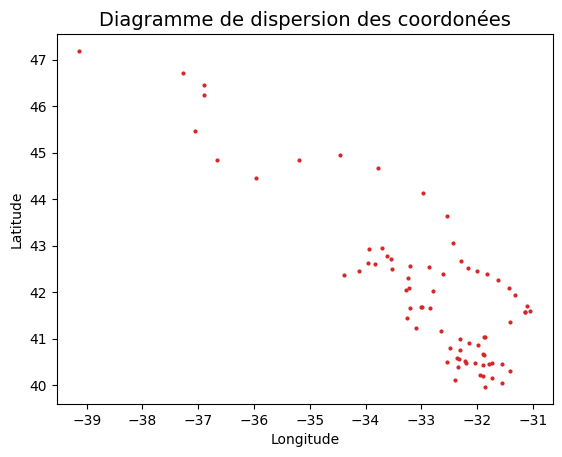

In [127]:
plt.scatter(lon,lat,s=4, c='#d62728')
plt.xlabel('Longitude',fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.title('Diagramme de dispersion des coordon√©es', fontsize= 14)



## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unit√© que vous avez choisie pour les masses plan√©taires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [ ]:
# Write your code here
planetdict = {'mercure':0.330,'v√©nus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'neptune':102, 'pluto':0.013}

# unit: 10^24 kg

In [ ]:
#write function here
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la plan√®te que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(mass=0):
  return mass/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(planetdict['jupiter'])

317.92294807370183

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unit√© que vous avez choisie pour les masses plan√©taires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-cl√© que vous avez sp√©cifi√©**.

In [ ]:
from ast import MatchClass
# √âcrivez votre fonction ici
def convert_m_Mterrejupiter(mass=0,ourplanet='jupiter') :
  return mass/planetdict[ourplanet]

# V√©rifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter(planetdict['jupiter'],'terre'),convert_m_Mterrejupiter(planetdict['jupiter'],'jupiter'))

317.92294807370183 1.0


In [ ]:
# Stocker le Mjupiter pour Q3
Mjupiter = convert_m_Mterrejupiter(planetdict['jupiter'], 'jupiter')

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unit√© que vous avez choisie [la plan√®te que vous voulez]).

In [ ]:
# √âcrivez votre fonction ici
def mass_conversion_two_arguments(mass,planet='jupiter') :
  a = mass/planetdict['terre'] # Terre
  b = mass/planetdict[planet] # La plan√®te que vous voulez utiliser comme r√©f√©rence
  return a,b
# V√©rifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unit√© choisie (par exemple, la plan√®te Mars)
print(mass_conversion_two_arguments(planetdict['jupiter'],))

(317.92294807370183, 1.0)


In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unit√© que vous avez choisie
# Retrouvez-vous la valeur originale ?
convert_m_Mterrejupiter(planetdict['neptune'])



0.05374077976817703